## Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's scatter function:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999
%matplotlib inline

In [4]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(38113, 81)


C:\Users\tarri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),City Electricity Consumption,City Utility Factor,Highway MPG (FT1),Unrounded Highway MPG (FT1),Highway MPG (FT2),Unrounded Highway MPG (FT2),Highway Gasoline Consumption (CD),Highway Electricity Consumption,Highway Utility Factor,Unadjusted City MPG (FT1),Unadjusted Highway MPG (FT1),Unadjusted City MPG (FT2),Unadjusted Highway MPG (FT2),Combined MPG (FT1),Unrounded Combined MPG (FT1),Combined MPG (FT2),Unrounded Combined MPG (FT2),Combined Electricity Consumption,Combined Gasoline Consumption (CD),Combined Utility Factor,Annual Fuel Cost (FT1),Annual Fuel Cost (FT2),Gas Guzzler Tax,Save or Spend (5 Year),Annual Consumption in Barrels (FT1),Annual Consumption in Barrels (FT2),Tailpipe CO2 (FT1),Tailpipe CO2 in Grams/Mile (FT1),Tailpipe CO2 (FT2),Tailpipe CO2 in Grams/Mile (FT2),Fuel Economy Score,GHG Score,GHG Score (Alt Fuel),My MPG Data,2D Passenger Volume,2D Luggage Volume,4D Passenger Volume,4D Luggage Volume,Hatchback Passenger Volume,Hatchback Luggage Volume,Start Stop Technology,Alternative Fuel/Technology,Electric Motor,Manufacturer Code,Gasoline/Electricity Blended (CD),Vehicle Charger,Alternate Charger,Hours to Charge (120V),Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,17,0.0,0,0.0,0.0,0.0,0.0,24,0.0,0,0.0,0.0,0.0,0.0,21.0,34.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,1750,0,NaN,-2000,16.480500,0.0,-1,444.350000,-1,0.0,-1,-1,-1,N,74,7,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,25,0.0,0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,1650,0,NaN,-1500,15.695714,0.0,-1,423.190476,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),4.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,18,0.0,0,0.0,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,22.0,24.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,2050,0,NaN,-3500,19.388824,0.0,-1,522.764706,-1,0.0,-1,-1,-1,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,False,NaN,NaN,0,0.0,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


Text(0.5,0,'Engine Displacement')

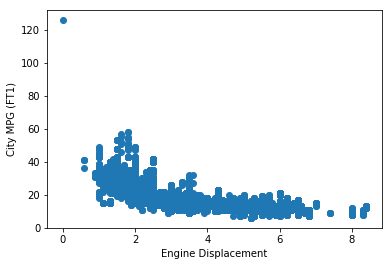

In [6]:
plt.scatter(data = fuel_econ, x = 'Engine Displacement', y='City MPG (FT1)')
plt.ylabel('City MPG (FT1)')
plt.xlabel('Engine Displacement')

## Alternative Approach
Seaborn's regplot function combines scatterplot creation with regression function fitting:

Text(0.5,0,'Engine Displacement')

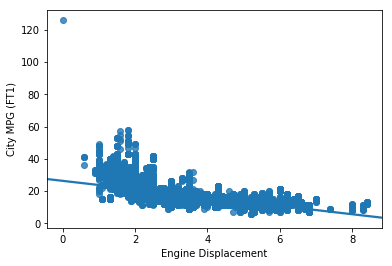

In [9]:
sns.regplot(x = 'Engine Displacement', y = 'City MPG (FT1)', data = fuel_econ)
plt.ylabel('City MPG (FT1)')
plt.xlabel('Engine Displacement')

## Overplotting, Transparency, and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.
Where more points overlap, the darker the image will be. Here, we can now see that there is a moderate negative relationship between the two numeric variables. Values of 0 and 10 on the x-axis are much rarer than the central values.
The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.

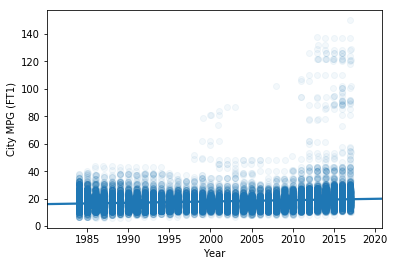

In [18]:
sns.regplot(data = fuel_econ, x = 'Year', y = 'City MPG (FT1)', x_jitter=.05, scatter_kws = {'alpha' : 1/20})

## Heat Maps
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d function.

plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)

sb.regplot(data = df, x = 'disc_var1', y = 'disc_var2', fit_reg = False,x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})


plt.subplot(1, 2, 2)

bins_x = np.arange(0.5, 10.5+1, 1)

bins_y = np.arange(-0.5, 10.5+1, 1)

plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',bins = [bins_x, bins_y], cmap='viridis_r', cmin=.05)

plt.colorbar();

Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram. We add a colorbar function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.

## Violin Plots
There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

Seaborn's violinplot function can be used to create violin plots combined with box plots – we'll discuss box plots on the next page.

base_color = sb.color_palette()[0]

sb.violinplot(data = df, x = 'cat_var', y = 'num_var', color=base_color, inner=None)

plt.xticks(rotaton = 15)

Here, you can see that the numeric data takes on a different shape in each categorical level: Some bimodality is suggested in group Alpha, a relatively high variance is observed in Beta, and Gamma and Delta are skewed negatively and positively, respectively. You can also see that each level has been rendered in a different color, like how the plain countplot was in the previous lesson. We can set the "color" parameter to make each curve the same color if it is not meaningful.

Inside each curve, there is a black shape with a white dot inside. This is the miniature box plot mentioned above. A further discussion of box plots will be performed on the next page. If you'd like to remove the box plot, you can set the inner = None parameter in the violinplot call to simplify the look of the final visualization

## Additional Variation
Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

## Box Plots
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot function.

base_color = sb.color_palette()[0]

sb.boxplot(data = df, x = 'x_data', y = 'y_data', color = base_color)

plt.xticks(rotation = 15)

The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot. In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR). From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default this is 1.5 times the IQR. For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.

Comparing the two plots, the box plot is a cleaner summary of the data than the violin plot. It's easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots. You can clearly see from the box plot that the Delta group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the Alpha level values. The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default.

In violinplot, there is an additional option for plotting summary statistics in the violin, beyond the default mini box plot. By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

Clustered Bar Charts
To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2')

The first categorical variable is depicted by broad x-position (Control, Experiment A, Experiment B). Within each of these groups, three bars are plotted, one for each level of the second categorical variable (Low, Medium, High). Color differentiates each level, and is documented with the legend in the upper-right corner of the plot. The plot tells us that the three "cat_var1" groups are fairly balanced in frequencies across the "cat_var2" levels, though the "Experiment A" group appears to have slighly lower counts of "Medium" points (orange central bar) compared to the other two groups.

The legend position in this example is a bit distracting, however. We can use an Axes method to set the legend properties on the Axes object returned from countplot.

ax = sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

## Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by ("cat_var" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on "num_var").

g = sb.FacetGrid(data = df, col = 'cat_var')

g.map(plt.hist, "num_var")

In the map call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like x = "num_var", or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)

g = sb.FacetGrid(data = df, col = 'cat_var')

g.map(plt.hist, "num_var", bins = bin_edges)

## Adapted Bar Charts
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

base_color = sb.color_palette()[0]

sb.barplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)

Different hues are automatically assigned to each category level unless a fixed color is set in the "color" parameter, like in countplot and violinplot.

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size. The Delta bar dips below the 0 axis due to the negative mean.

As an alternative, the pointplot function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

sb.pointplot(data = df, x = 'cat_var', y = 'num_var', linestyles = "")

plt.ylabel('Avg. value of num_var')

By default, pointplotwill connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via linestyles = "" for nominal data.

## Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. Often, we have only one observation per time period, like in stock or currency charts. While there is a seaborn function tsplot that is intended to be used with time series data, it is fairly specialized and (as of this writing's seaborn 0.8) is slated for major changes.

Instead, we will make use of Matplotlib's errorbar function, performing some processing on the data in order to get it into its necessary form.

plt.errorbar(data = df, x = 'num_var1', y = 'num_var2')

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. In order to create the line plot as intended, we need to do additional work to summarize the data.

xbin_edges = np.arange(0.5, df['num_var1'].max()+0.25, 0.25)

xbin_centers = (xbin_edges + 0.25/2)[:-1]


data_xbins = pd.cut(df['num_var1'], xbin_edges, right = False, include_lowest = True)

y_means = df['num_var2'].groupby(data_xbins).mean()

y_sems = df['num_var2'].groupby(data_xbins).sem()

plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)

Since the x-variable ('num_var1') is continuous, we first set a number of bins into which the data will be grouped. In addition to the usual edges, the center of each bin is also computed for later plotting. For the points in each bin, we compute the mean and standard error of the mean. Note that the cut function call is different here than in the previous section, since we don't need to compute individual point weights.

An interesting part of the above summarization of the data is that the uncertainty in the mean generally increases with increasing x-values. But for the largest two points, there are no error bars. Looking at the default errorbar plot (or the scatterplot below), we can see this is due to there only being one point in each of the last two bins.